# Major Task:

**We will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.**

### 1. Importing Packages

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import io
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline

### 2. Reading Data

In [73]:
df = pd.read_csv("/content/StudentsScores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [74]:
# Viewing the data shape
df.shape

(25, 2)

In [75]:
# Information about the type of Data that we're having
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [76]:
# Let's find out more about our variables.
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### 3. Exploratory Data Analysis Part
**In this part we are going to visualise some of the patterns in our data.**

<Axes: >

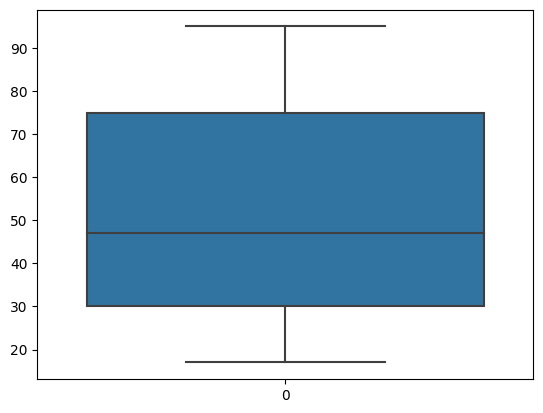

In [77]:
sns.boxplot(df.Scores)

<Axes: >

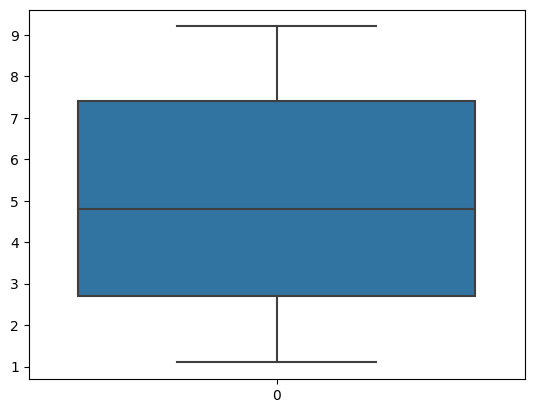

In [78]:
sns.boxplot(df.Hours)

In [79]:
# Exploring null/NaN values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Data Visualization.
**In this part we are going to present our observations in a visual way.**

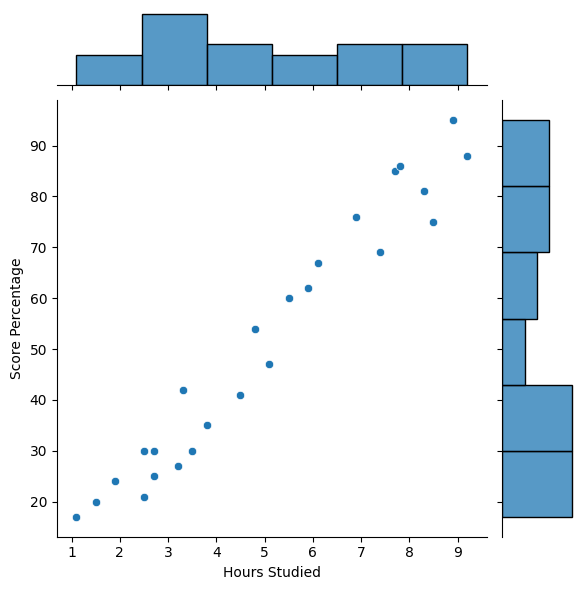

In [80]:
sns.jointplot(x = "Hours", y = "Scores", data = df)
plt.xlabel("Hours Studied")
plt.ylabel("Score Percentage")
plt.show()

### 4. Linear Regression Model
**We have two variables. The independent variable, which is the number of hours, and the dependent variable which is the percentage score. The LRM is going to express the relationship between the two variables. However, we need to to prepare the data for splitting them.**

In [81]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.20, random_state = 42)

### 5. Training the Model

In [82]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_train)
y_predict

array([28.96850337, 34.77775026, 52.20549094, 39.61878934, 17.35000959,
       33.80954245, 46.39624405, 88.99738793, 85.12455667, 36.71416589,
       28.96850337, 21.22284085, 49.3008675 , 61.8875691 , 78.34710196,
       56.0783222 , 77.37889414, 13.47717832, 74.4742707 , 91.90201137])

### 6. Training the Algorithm

In [83]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training is Complete.")

Training is Complete.


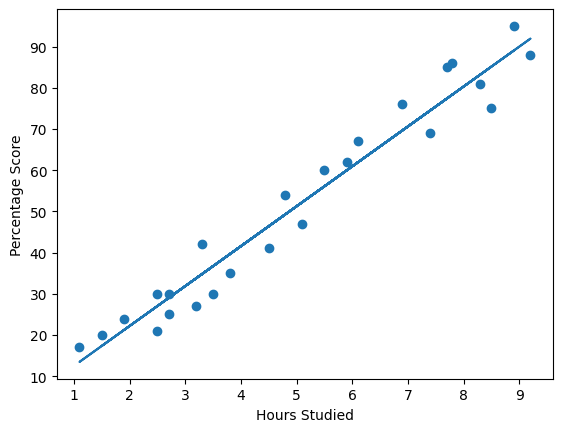

In [84]:
line = regressor.coef_*X+regressor.intercept_
# Plotting the Regression Line:
plt.scatter(X, y)
plt.plot(X, line);
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

### 7. Checking the Accuracy scores for train and test sets

In [85]:
print("Test score: ", str(regressor.score(X_test, y_test)))
print("Train score: ", str(regressor.score(X_train, y_train)))

Test score:  0.9678055545167994
Train score:  0.9491209376364416


In [86]:
y_test

array([81, 30, 21, 76, 62])

In [87]:
y_predict[:5]

array([28.96850337, 34.77775026, 52.20549094, 39.61878934, 17.35000959])

In [88]:
submission = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_predict[:5]
})
submission

,Actual,Predicted
0,81,28.968503
1,30,34.777750
2,21,52.205491
3,76,39.618789
4,62,17.350010


In [89]:
#Let's predict the score for 8.5 hpurs
print('Score of student who studied for 1.1 hours', regressor.predict([[1.1]]))

Score of student who studied for 1.1 hours [13.47717832]


### 8. Model Evaluation Metrics

In [90]:
#Checking the efficiency of model
mean_squ_error = mean_squared_error(y_test, y_predict[:5])
mean_abs_error = mean_absolute_error(y_test, y_predict[:5])
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)

Mean Squred Error: 1404.2200673968694
Mean absolute Error: 33.80918778157651
